In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os.path as op
import scipy.signal as sg
from scipy.stats import zscore
import h5py
import matplotlib.pyplot as plt
import os

/Users/belinskaia/.pyenv/versions/3.9.1/envs/brain3/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
path_nfb = r'/share/nastya/experiments/1/nfb'
import sys
sys.path.insert(0, path_nfb)
from utils.load_results import load_data

In [33]:
file_path_first_day = r'/Users/belinskaia/Desktop/Tum_Data/A05_alpha_train/video_fb_subj_A05_3_01-29_10-34-32/experiment_data.h5'
#file_path_first_second = r'/Users/belinskaia/Desktop/Tum_mock/CO1/video_fb_subj_С01_2_01-13_16-07-53/experiment_data.h5'
#file_path_first_third = r'/Users/belinskaia/Desktop/Tum_mock/CO1/video_fb_subj_С01_3_01-14_10-23-24/experiment_data.h5'


In [34]:
with h5py.File(file_path_first_day) as f:
            spat_filter = f['protocol6/signals_stats/Alpha0/spatial_filter'][...]
            band = f['protocol6/signals_stats/Alpha0/bandpass'][...]

df_1, fs, channels, p_names = load_data(file_path_first_day)

In [35]:
df_1.block_name.unique()

array(['Close', 'Baseline0', 'PauseBL', 'Baseline', 'PauseFB', 'FB0'],
      dtype=object)

In [36]:
# Alpha filter 
slc = np.arange(2*60*fs, 4*60*fs)
fb_alpha = df_1.query('block_name == "FB0"')[channels].values.dot(spat_filter)

fb_alpha = sg.filtfilt(*sg.butter(4, band/fs*2, 'band'), fb_alpha)
fb_alpha = np.abs(sg.hilbert(zscore(fb_alpha)))


df_fb_1 = df_1[df_1['block_name'] =='FB0']
df_fb_1['alpha_env'] = fb_alpha
df_fb_1['block_number'] = df_1['block_number']

<ipython-input-36-cd1eaba717ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fb_1['alpha_env'] = fb_alpha
<ipython-input-36-cd1eaba717ef>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fb_1['block_number'] = df_1['block_number']


In [37]:
# Theta filter
theta_band = np.array([4.0, 8.2])

theta_env = df_1.query('block_name == "FB0"')[channels].values.dot(spat_filter)
theta_env = sg.filtfilt(*sg.butter(4, theta_band/fs*2, 'band'), theta_env)
theta_env = np.abs(sg.hilbert(zscore(theta_env)))

df_fb_1['theta_env'] = theta_env

<ipython-input-37-6d0c3eb5ff5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fb_1['theta_env'] = theta_env


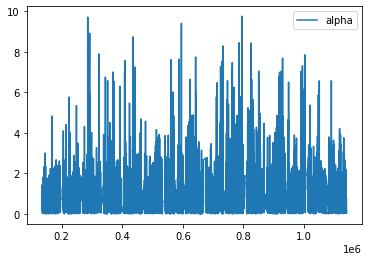

In [38]:
plt.plot(df_fb_1['alpha_env'], label='alpha')
#plt.plot(df_fb_1['theta_env'], label='theta')
plt.legend(loc=1)

In [39]:
df_fb_1['alpha_env'].max()

9.754252323706387

In [40]:
#df_fb_1 = df_fb_1[df_fb_1['alpha_env'] <= 8]
#df_fb_1 = df_fb_1[df_fb_1['theta_env'] <= 8]


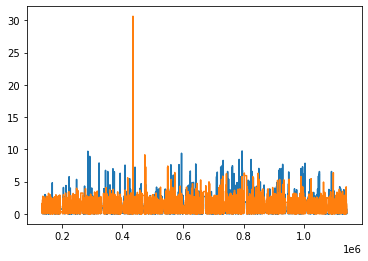

In [41]:
plt.plot(df_fb_1['alpha_env'], label='alpha')
plt.plot(df_fb_1['theta_env'], label='theta')

In [42]:
median_theta = df_fb_1['theta_env'].median()
median_theta

1.0795133279023361

In [43]:
df_fb_1['alpha/thera'] = df_fb_1['alpha_env']/median_theta


<ipython-input-43-b2b0730244f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fb_1['alpha/thera'] = df_fb_1['alpha_env']/median_theta


<AxesSubplot:>

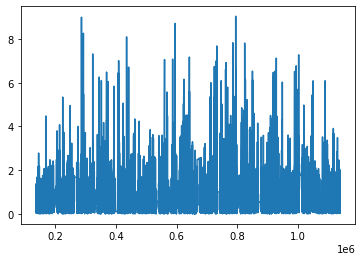

In [44]:
df_fb_1['alpha/thera'].plot()

In [45]:
df_fb_1['subj'] = 'A05'
df_fb_1['day'] = 3
df_fb_1['fb_type'] = 'FB0'

<ipython-input-45-d0ea610bd360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fb_1['subj'] = 'A05'
<ipython-input-45-d0ea610bd360>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fb_1['day'] = 3
<ipython-input-45-d0ea610bd360>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [46]:
df_fb_1 = df_fb_1.drop(columns=['events','signal_Alpha0',
                                'FP1', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FT9', 'FC5', 'FC1', 'FC2',
                                'FC6', 'FT10', 'T7', 'C3', 'CZ', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2',
                                'CP6', 'TP10', 'P7', 'P3', 'PZ', 'P4', 'P8', 'O1', 'OZ', 'O2'])

In [47]:
df_fb_1.head(3)

,VIDEO,block_name,block_number,alpha_env,theta_env,alpha/thera,subj,day,fb_type
135005,-0.358279,FB0,6,0.272261,0.608096,0.252207,A05,3,FB0
135006,-0.358293,FB0,6,0.401561,0.470617,0.371984,A05,3,FB0
135007,-0.358275,FB0,6,0.410167,0.483095,0.379956,A05,3,FB0


In [48]:
df_fb_1.to_csv('A05_3_fb0.csv', index=False)

In [158]:
threshold_factor = 2
median = df_fb_2['alpha/thera'].median()
threshold = threshold_factor * median

In [159]:
columns=[ 'metric', 'metric_type', 'block_number','threshold_factor']

stats_df_2 = pd.DataFrame(columns=columns)
for block_number in df_fb_2.block_number.unique():
    signal = df_fb_2.loc[df_fb_2['block_number'] == block_number]
     # get spindles mask
    magnitude_j = np.mean(signal['alpha/thera']) * 1e6
    spindles_mask = signal['alpha/thera'] > threshold
    if np.sum(np.diff(spindles_mask.astype(int)) == 1) > 0:
         # number of spindles
        n_spindles_j = np.sum(np.diff(spindles_mask.astype(int)) == 1)

         # mean spindle duration
        duration_j = np.sum(spindles_mask) / n_spindles_j / fs

         # mean spindle amplitue
        amplitude_j = np.mean(signal[spindles_mask]['alpha/thera']) * 1e6
    else:
        n_spindles_j = 1 # TODO replace by NaN
        duration_j = 0.005
        amplitude_j = threshold * 1e6 
        #
    stats_df_2 = stats_df_2.append(pd.DataFrame(
    { 'metric': [magnitude_j, n_spindles_j/(len(df_fb['alpha/thera'])/fs/60), duration_j, amplitude_j],
    'metric_type': ['magnitude','n_spindles', 'duration', 'amplitude'], 
    'block_number': block_number, 'threshold_factor': threshold_factor}),
    ignore_index=True)

In [161]:
stats_df_2.head(3)

,metric,metric_type,block_number,threshold_factor
0,1.189456e+06,magnitude,6,2
1,5.141577e+00,n_spindles,6,2
2,1.447143e-01,duration,6,2


In [162]:
stats_df.head(3)

,metric,metric_type,block_number,threshold_factor
0,1.189456e+06,magnitude,6,2
1,5.141577e+00,n_spindles,6,2
2,1.447143e-01,duration,6,2


In [149]:
stats_df.block_number.unique()

array([6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34],
      dtype=object)

In [138]:
stats_df['day'] = 1
stats_df.head(3)

,metric,metric_type,block_number,threshold_factor,day
0,1.673319e+06,magnitude,6,2,1
1,5.108190e+00,n_spindles,6,2,1
2,1.845359e-01,duration,6,2,1


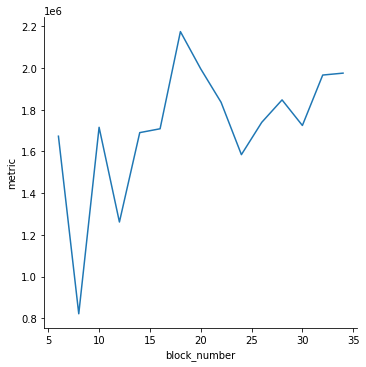

In [137]:
sns.relplot(x='block_number', y='metric', data=stats_df.loc[stats_df['metric_type'].isin(['magnitude'])], 
            kind="line")